In [1]:
# project: p13
# submitter: yzhang2232
# partner: none
# hours: 3

In [2]:
import sqlite3
import os
import requests
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import math

In [3]:
# ensures that font.size setting remains permanent
%matplotlib inline 
pd.set_option('display.max_colwidth', None)
matplotlib.rcParams["font.size"] = 13 # don't use value > 13! Otherwise your y-axis tick labels will be different. 

In [4]:
def download(filename, url):
    if os.path.exists(filename):
        return (str(filename) + " already exists!")
    r = requests.get(url)
    assert(r.status_code == 200)
    data = r.text
    f = open(filename, "w", encoding = "utf-8")
    f.write(data)

    return (str(filename) + " created!")

In [5]:
download('QSrankings.json', "https://raw.githubusercontent.com/msyamkumar/cs220-f21-projects/main/p13/QSranking.json")

'QSrankings.json already exists!'

In [6]:
rankings = pd.read_json("QSrankings.json")

In [7]:
conn = sqlite3.connect('rankings.db')
rankings.to_sql("rankings", conn, if_exists = "replace", index = False)

# remember to do conn.close() at the end of your notebook or your code may crash when we run test.py.

In [8]:
pd.read_sql("SELECT * FROM sqlite_master", conn)

,type,name,tbl_name,rootpage,sql
0,table,rankings,rankings,2,"CREATE TABLE ""rankings"" (\n""rank"" INTEGER,\n ""year"" INTEGER,\n ""institution_name"" TEXT,\n ""country"" TEXT,\n ""academic_reputation"" REAL,\n ""employer_reputation"" REAL,\n ""faculty_student_score"" REAL,\n ""citations_per_faculty"" REAL,\n ""international_faculty"" REAL,\n ""international_students"" REAL,\n ""overall_score"" REAL\n)"


In [9]:
pd.read_sql(
"""
SELECT *
FROM rankings
LIMIT 7
""", conn)

,rank,year,institution_name,country,academic_reputation,employer_reputation,faculty_student_score,citations_per_faculty,international_faculty,international_students,overall_score
0,1,2018,Massachusetts Institute Of Technology,United States,100.0,100.0,100.0,99.9,100.0,96.1,100.0
1,2,2018,Stanford University,United States,100.0,100.0,100.0,99.4,99.6,72.7,98.7
2,3,2018,Harvard University,United States,100.0,100.0,98.3,99.9,96.5,75.2,98.4
3,4,2018,California Institute Of Technology,United States,99.5,85.4,100.0,100.0,93.4,89.2,97.7
4,5,2018,University Of Cambridge,United Kingdom,100.0,100.0,100.0,78.3,97.4,97.7,95.6
5,6,2018,University Of Oxford,United Kingdom,100.0,100.0,100.0,76.3,98.6,98.5,95.3
6,7,2018,Ucl,United Kingdom,99.7,99.5,99.1,74.7,96.6,100.0,94.6


In [10]:
#q1
pd.read_sql(
"""
SELECT institution_name, international_students
FROM rankings
WHERE country = "Canada" AND year = 2020
ORDER BY international_students DESC
LIMIT 10
""", conn)

,institution_name,international_students
0,Mcgill University,96.2
1,University Of Toronto,93.0
2,Simon Fraser University,91.5
3,University Of Waterloo,84.1
4,University Of Alberta,80.8
5,University Of British Columbia,79.3
6,Dalhousie University,73.4
7,Université De Montréal,61.8
8,University Of Calgary,61.2
9,University Of Ottawa,56.7


In [11]:
#q2
pd.read_sql(
"""
SELECT institution_name, academic_reputation + employer_reputation AS reputation
FROM rankings
WHERE country = "United States" AND year = 2019
ORDER BY reputation DESC, institution_name
LIMIT 10
""", conn)

,institution_name,reputation
0,Harvard University,200.0
1,Massachusetts Institute Of Technology,200.0
2,Stanford University,200.0
3,"University Of California, Berkeley",199.8
4,Yale University,199.6
5,"University Of California, Los Angeles",199.1
6,Columbia University,197.1
7,Princeton University,196.6
8,University Of Chicago,190.3
9,Cornell University,189.2


In [12]:
#q3
most_institutions_2020 = pd.read_sql(
"""
SELECT country, COUNT(*) AS num_of_institutions
FROM rankings
WHERE year = 2020
GROUP BY country
ORDER BY num_of_institutions DESC, country
LIMIT 10
""", conn)
most_institutions_2020

,country,num_of_institutions
0,United States,74
1,United Kingdom,45
2,Germany,23
3,Australia,21
4,Canada,14
5,China,14
6,France,14
7,Japan,14
8,Netherlands,13
9,Russia,13


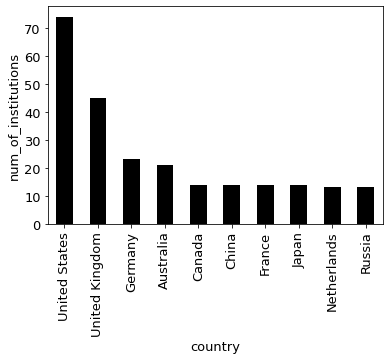

In [13]:
#q4
ax = most_institutions_2020.plot.bar(x = "country", y = "num_of_institutions", color = "k")
ax.set_xlabel("country")
ax.set_ylabel("num_of_institutions")
ax.get_legend().remove()
None

In [14]:
#q5
highest_total_2019 = pd.read_sql(
"""
SELECT country, SUM(overall_score) AS total_score
FROM rankings
WHERE year = 2019
GROUP BY country
ORDER BY total_score DESC, country
LIMIT 10
""", conn)
highest_total_2019

,country,total_score
0,United States,4298.4
1,United Kingdom,2539.2
2,Germany,1098.2
3,Australia,1093.8
4,Japan,752.9
5,China,743.4
6,Canada,705.3
7,Netherlands,674.9
8,South Korea,612.8
9,France,595.2


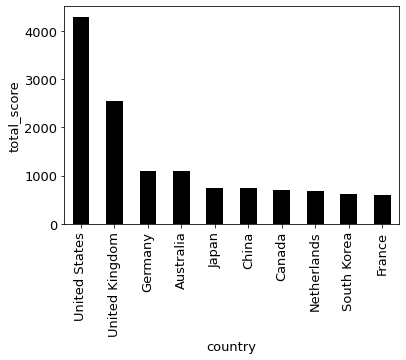

In [15]:
#q6
ax = highest_total_2019.plot.bar(x = "country", y = "total_score", color = "k")
ax.set_xlabel("country")
ax.set_ylabel("total_score")
ax.get_legend().remove()
None

In [16]:
#q7
highest_us_2020 = pd.read_sql(
"""
SELECT institution_name, international_faculty + international_students AS international_score
FROM rankings
WHERE year = 2020 AND country = "United States"
ORDER BY international_score DESC, country
LIMIT 10
""", conn)
highest_us_2020

,institution_name,international_score
0,Massachusetts Institute Of Technology,194.1
1,California Institute Of Technology,186.7
2,Carnegie Mellon University,183.5
3,Rice University,180.4
4,Northeastern University,179.1
5,Stanford University,167.5
6,Cornell University,166.1
7,Purdue University,158.2
8,University Of Rochester,157.9
9,University Of Chicago,151.2


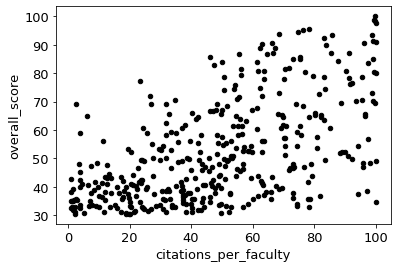

In [17]:
#q8
year_2018 = pd.read_sql(
"""
SELECT *
FROM rankings
WHERE year = 2018
""", conn)
year_2018.plot.scatter(x = "citations_per_faculty", y = "overall_score", color = "k")
None

In [18]:
rankings

,rank,year,institution_name,country,academic_reputation,employer_reputation,faculty_student_score,citations_per_faculty,international_faculty,international_students,overall_score
0,1,2018,Massachusetts Institute Of Technology,United States,100.0,100.0,100.0,99.9,100.0,96.1,100.0
1,2,2018,Stanford University,United States,100.0,100.0,100.0,99.4,99.6,72.7,98.7
2,3,2018,Harvard University,United States,100.0,100.0,98.3,99.9,96.5,75.2,98.4
3,4,2018,California Institute Of Technology,United States,99.5,85.4,100.0,100.0,93.4,89.2,97.7
4,5,2018,University Of Cambridge,United Kingdom,100.0,100.0,100.0,78.3,97.4,97.7,95.6
...,...,...,...,...,...,...,...,...,...,...,...
1196,395,2020,Kobe University,Japan,24.6,27.4,58.3,15.4,10.2,9.0,28.4
1197,395,2020,Tampere University,Finland,24.8,30.7,29.0,38.1,29.2,8.6,28.4
1198,395,2020,The American University In Cairo,Egypt,24.6,37.4,43.7,5.7,93.9,3.8,28.4
1199,398,2020,University Of St Gallen,Switzerland,9.7,66.4,8.1,31.8,100.0,93.5,28.3


In [19]:
#q9
citation_overall_2019 = pd.read_sql(
"""
SELECT institution_name, ((citations_per_faculty * international_faculty) / 100) AS citation_score, overall_score
FROM rankings
WHERE year = 2019
""", conn)
citation_overall_2019.corr()['citation_score']['overall_score']

0.557397228343763

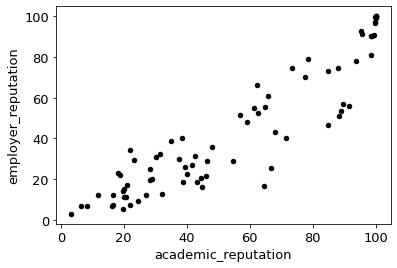

In [20]:
#q10
us_2019 = pd.read_sql(
"""
SELECT *
FROM rankings
WHERE year = 2019 AND country = "United States"
""", conn)
us_2019.plot.scatter(x = "academic_reputation", y = "employer_reputation", color = "k")
None

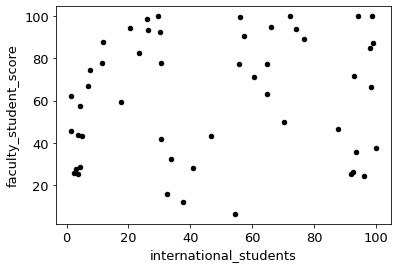

In [21]:
#q11
inter_facultystud_2020 = pd.read_sql(
"""
SELECT institution_name, country, international_students, faculty_student_score, MIN(rank) as minrank
FROM rankings
WHERE year = 2020
GROUP BY country
""", conn)
inter_facultystud_2020.plot.scatter(x = "international_students", y = "faculty_student_score", color = "k")
None

In [22]:
#q12
intern_overall_2020_us = pd.read_sql(
"""
SELECT international_students, overall_score
FROM rankings
WHERE year = 2020 AND rank <= 100 AND country = "United States"
""", conn)
us_2020 = intern_overall_2020_us.corr()["international_students"]["overall_score"]

intern_overall_2020_uk = pd.read_sql(
"""
SELECT international_students, overall_score
FROM rankings
WHERE year = 2020 AND rank <= 100 AND country = "United Kingdom"
""", conn)
uk_2020 = intern_overall_2020_uk.corr()["international_students"]["overall_score"]

us_2020 - uk_2020

-0.18978846844574526

In [23]:
#q13
cit_intern_2019 = pd.read_sql(
"""
SELECT country, SUM((citations_per_faculty * international_faculty) / 100) as sum_citations
FROM rankings
WHERE year = 2019
GROUP BY country
ORDER BY sum_citations DESC
LIMIT 15
""", conn)
cit_intern_2019

,country,sum_citations
0,United States,2623.8207
1,United Kingdom,2347.1602
2,Australia,1255.5530
3,Netherlands,748.4268
4,Canada,724.5029
5,Switzerland,561.8790
6,China,482.2577
7,Germany,455.5466
8,Hong Kong,375.3032
9,New Zealand,327.3357


In [24]:
#q14
avg_cit_intern_2019 = pd.read_sql(
"""
SELECT country, AVG((citations_per_faculty * international_faculty) / 100) as avg_citations
FROM rankings
WHERE year = 2019 AND rank <= 300
GROUP BY country
ORDER BY avg_citations DESC
""", conn)
avg_cit_intern_2019

,country,avg_citations
0,Singapore,80.150000
1,Switzerland,75.497000
2,Hong Kong,62.550533
3,Australia,61.362388
4,Netherlands,56.166733
5,New Zealand,53.226220
6,United Kingdom,52.889084
7,Canada,50.779723
8,Denmark,46.196200
9,Norway,46.083300


In [25]:
#q15
highest_cit_intern_2020 = pd.read_sql(
"""
SELECT country, institution_name, MAX((citations_per_faculty * international_faculty) / 100) as max_int_citations
FROM rankings
WHERE year = 2020 AND citations_per_faculty IS NOT NULL AND international_faculty IS NOT NULL
GROUP BY country
ORDER BY max_int_citations DESC
""", conn)
highest_cit_intern_2020

,country,institution_name,max_int_citations
0,United States,Massachusetts Institute Of Technology,99.8000
1,Switzerland,Ecole Polytechnique Fédérale De Lausanne,98.9000
2,Netherlands,Eindhoven University Of Technology,95.4493
3,United Kingdom,London School Of Economics And Political Science,91.1000
4,Hong Kong,The Hong Kong University Of Science And Technology,89.5000
5,Singapore,Nanyang Technological University,88.8000
6,Australia,The University Of Western Australia,88.3000
7,Belgium,Katholieke Universiteit Leuven,76.7700
8,New Zealand,University Of Waikato,73.6434
9,Canada,Western University,72.3240


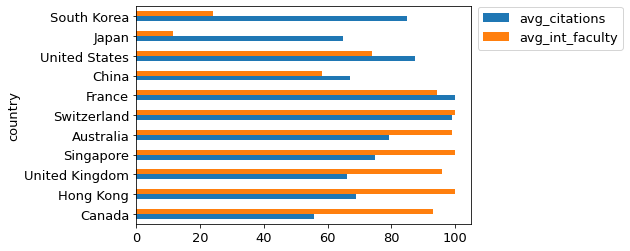

In [26]:
#q16
top50_cit_intern_2018 = pd.read_sql(
"""
SELECT country, AVG(citations_per_faculty) AS avg_citations, AVG(international_faculty) AS avg_int_faculty
FROM rankings
WHERE year = 2018 AND rank <= 50
GROUP BY country
ORDER BY avg_citations - avg_int_faculty 
""", conn)
ax = top50_cit_intern_2018.plot.barh(x = "country")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.9))
None

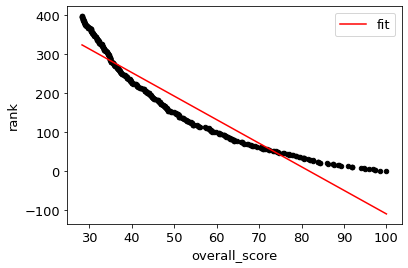

In [27]:
#q17
overrank_2020 = pd.read_sql(
"""
SELECT rank, overall_score
FROM rankings
WHERE year = 2020
""", conn)
overrank_2020["1"] = 1
res = np.linalg.lstsq(overrank_2020[["overall_score", "1"]], overrank_2020["rank"], rcond=None)
coeff = res[0]
m = coeff[0]
n = coeff[1]
ax = overrank_2020.plot.scatter(x = "overall_score", y ="rank", color = "k")

overrank_2020["fit"] = overrank_2020["overall_score"] * m + n 
overrank_2020.plot.line(x = "overall_score", y = "fit", color = "r", ax = ax)
None

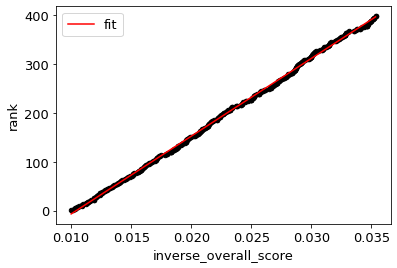

In [28]:
#q18
inver_overrank_2020 = pd.read_sql(
"""
SELECT rank, 1 / overall_score as inverse_overall_score
FROM rankings
WHERE year = 2020
""", conn)
inver_overrank_2020["1"] = 1
res = np.linalg.lstsq(inver_overrank_2020[["inverse_overall_score", "1"]], inver_overrank_2020["rank"], rcond=None)
coeff = res[0]
m = coeff[0]
n = coeff[1]
ax = inver_overrank_2020.plot.scatter(x = "inverse_overall_score", y ="rank", color = "k")

inver_overrank_2020["fit"] = inver_overrank_2020["inverse_overall_score"] * m + n 
inver_overrank_2020.plot.line(x = "inverse_overall_score", y = "fit", color = "r", ax = ax)
None

In [29]:
#q19
math.ceil(m * (1 / 72) + n)

56

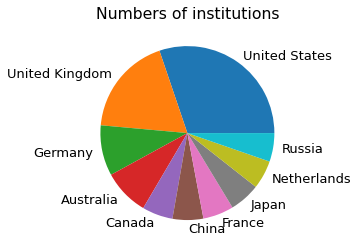

In [30]:
#q20
num_of_institutions = list(most_institutions_2020["num_of_institutions"])
country = list(most_institutions_2020["country"])
df = pd.DataFrame({"num_of_institutions": num_of_institutions}, index = country)
ax = df.plot.pie(y = "num_of_institutions")
ax.set_ylabel("")
ax.get_legend().remove()
plt.title("Numbers of institutions")
None

In [31]:
conn.close()